## Feature Engineering

### Author: Lucia Zou
### Contact: lucia.zouyuebca@gmail.com 
### Date: Nov.8th, 2023

### Table of Contents
- [New Column Alcohol Type](#New-Column-Alcohol-Type)
- [New Column Profit](#New-Column-Profit)
- [New Column Month Week Day](#New-Column-Month-and-Day-and-Week)
- [Dummy Varibales for Volume](#Dummy-Variables-for-Volume)
- [Correlations](#Correlations)

In [1]:
import pyarrow as pa
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df8=pd.read_parquet('IowaAfterClean3.parquet')

In [4]:
df8.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,11.0,Adair,1081600.0,...,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.8,1.26
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,31.0,Adair,1081200.0,...,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.0,0.79
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,42.0,Adams,1031100.0,...,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.5,2.77
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,42.0,Adams,1031100.0,...,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.0,2.37
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,77.0,Allamakee,1012200.0,...,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.5,0.39


In [5]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805303 entries, 0 to 2805302
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   invoice_and_item_number  object 
 1   date                     object 
 2   store_number             int64  
 3   store_name               object 
 4   address                  object 
 5   city                     object 
 6   zip_code                 float64
 7   county_number            float64
 8   county                   object 
 9   category                 float64
 10  category_name            object 
 11  vendor_number            float64
 12  vendor_name              object 
 13  item_number              int64  
 14  item_description         object 
 15  pack                     int64  
 16  bottle_volume_ml         int64  
 17  state_bottle_cost        float64
 18  state_bottle_retail      float64
 19  bottles_sold             int64  
 20  sale_dollars             float64
 21  volume_s

Make a subset to run the codes faster

In [61]:
#subset_df = df8.sample(n=50000, random_state=42)

### 

### New Column-Alcohol Type

We would like to have a new column that categorize alcohol in more general ways.

In [6]:
print(df8['category_name'].unique())

['Whiskey Liqueur' 'Cream Liqueurs' 'American Vodka' 'Scotch Whiskies'
 'Imported Vodka' 'Neutral Grain Spirits' 'Flavored Rum'
 'American Schnapps' 'Tennessee Whiskies' 'American Brandies'
 'Canadian Whiskies' 'Straight Bourbon Whiskies' 'Imported Schnapps'
 'American Flavored Vodka' '100% Agave Tequila' 'Special Order Items'
 'American Cordials & Liqueur' 'American Dry Gins' 'Imported Brandies'
 'White Rum' 'Imported Flavored Vodka' 'Blended Whiskies'
 'Imported Cordials & Liqueur' 'Mixto Tequila' 'Cocktails /RTD'
 'Spiced Rum' 'Imported Distilled Spirits Specialty' 'Irish Whiskies'
 'American Distilled Spirits Specialty' 'Temporary & Specialty Packages'
 'Aged Dark Rum' 'Straight Rye Whiskies' 'Corn Whiskies' 'Coffee Liqueurs'
 'Imported Dry Gins' 'Single Malt Scotch' 'Triple Sec' 'Gold Rum'
 'Single Barrel Bourbon Whiskies' 'Mezcal' 'Bottled in Bond Bourbon'
 'Flavored Gin' 'American Sloe Gins' 'Distilled Spirits Specialty'
 'Imported Gins' 'Imported Whiskies' 'American Whiskies']


In [8]:
sorted_unique_categories = df8['category_name'].unique()
sorted_unique_categories.sort()
print(sorted_unique_categories)

['100% Agave Tequila' 'Aged Dark Rum' 'American Brandies'
 'American Cordials & Liqueur' 'American Distilled Spirits Specialty'
 'American Dry Gins' 'American Flavored Vodka' 'American Schnapps'
 'American Sloe Gins' 'American Vodka' 'American Whiskies'
 'Blended Whiskies' 'Bottled in Bond Bourbon' 'Canadian Whiskies'
 'Cocktails /RTD' 'Coffee Liqueurs' 'Corn Whiskies' 'Cream Liqueurs'
 'Distilled Spirits Specialty' 'Flavored Gin' 'Flavored Rum' 'Gold Rum'
 'Imported Brandies' 'Imported Cordials & Liqueur'
 'Imported Distilled Spirits Specialty' 'Imported Dry Gins'
 'Imported Flavored Vodka' 'Imported Gins' 'Imported Schnapps'
 'Imported Vodka' 'Imported Whiskies' 'Irish Whiskies' 'Mezcal'
 'Mixto Tequila' 'Neutral Grain Spirits' 'Scotch Whiskies'
 'Single Barrel Bourbon Whiskies' 'Single Malt Scotch'
 'Special Order Items' 'Spiced Rum' 'Straight Bourbon Whiskies'
 'Straight Rye Whiskies' 'Temporary & Specialty Packages'
 'Tennessee Whiskies' 'Triple Sec' 'Whiskey Liqueur' 'White Rum']

In [9]:
category_mapping = {
    '100% Agave Tequila': 'Tequila',
    'Aged Dark Rum': 'Rum',
    'American Brandies': 'Brandy',
    'American Cordials & Liqueur': 'Cordials & Liqueur',
    'American Distilled Spirits Specialty': 'Specialty',
    'American Dry Gins': 'Gin',
    'American Flavored Vodka': 'Vodka',
    'American Schnapps': 'Schnapps',
    'American Sloe Gins': 'Gin',
    'American Vodka': 'Vodka',
    'Blended Whiskies': 'Whisky',
    'Bottled in Bond Bourbon': 'Bourbon',
    'Canadian Whiskies': 'Whisky',
    'Cocktails /RTD': 'Cocktail',
    'Coffee Liqueurs': 'Cordials & Liqueur',
    'Corn Whiskies': 'Whisky',
    'Cream Liqueurs': 'Cordials & Liqueur',
    'Distilled Spirits Specialty': 'Specialty',
    'Flavored Gin': 'Gin',
    'Flavored Rum': 'Rum',
    'Gold Rum': 'Rum',
    'Imported Brandies': 'Brandy',
    'Imported Cordials & Liqueur': 'Cordials & Liqueur',
    'Imported Distilled Spirits Specialty': 'Specialty',
    'Imported Dry Gins': 'Gin',
    'Imported Flavored Vodka': 'Vodka',
    'Imported Schnapps': 'Schnapps',
    'Imported Vodka': 'Vodka',
    'Irish Whiskies': 'Whisky',
    'Mezcal': 'Other Categories', 
    'Mixto Tequila': 'Tequila',
    'Neutral Grain Spirits': 'Spirits',
    'Scotch Whiskies': 'Whisky',
    'Single Barrel Bourbon Whiskies': 'Whisky',
    'Single Malt Scotch': 'Scotch',
    'Special Order Items': 'Specialty',
    'Spiced Rum': 'Rum',
    'Straight Bourbon Whiskies': 'Whisky',
    'Straight Rye Whiskies': 'Whisky',
    'Temporary & Specialty Packages': 'Specialty',
    'Tennessee Whiskies': 'Whisky',
    'Triple Sec': 'Cordials & Liqueur',
    'Whiskey Liqueur': 'Spirits', 
    'White Rum': 'Rum'
}

# Apply mapping to create a new column 'Alcohol_Type'
df8['Alcohol_Type'] = df8['category_name'].map(category_mapping).fillna('Other Categories')

In [10]:
#sanity check
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805303 entries, 0 to 2805302
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   invoice_and_item_number  object 
 1   date                     object 
 2   store_number             int64  
 3   store_name               object 
 4   address                  object 
 5   city                     object 
 6   zip_code                 float64
 7   county_number            float64
 8   county                   object 
 9   category                 float64
 10  category_name            object 
 11  vendor_number            float64
 12  vendor_name              object 
 13  item_number              int64  
 14  item_description         object 
 15  pack                     int64  
 16  bottle_volume_ml         int64  
 17  state_bottle_cost        float64
 18  state_bottle_retail      float64
 19  bottles_sold             int64  
 20  sale_dollars             float64
 21  volume_s

In [64]:
df8['Alcohol_Type'].nunique()

14

Since we only have 14 unique values for this column, we would like to create dummies for it in order to put it in models.

###

### New Column-Profit

In [11]:
df8['profit'] = (df8['state_bottle_retail'] - df8['state_bottle_cost']) * df8['bottles_sold']

In [12]:
#sanity check
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805303 entries, 0 to 2805302
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   invoice_and_item_number  object 
 1   date                     object 
 2   store_number             int64  
 3   store_name               object 
 4   address                  object 
 5   city                     object 
 6   zip_code                 float64
 7   county_number            float64
 8   county                   object 
 9   category                 float64
 10  category_name            object 
 11  vendor_number            float64
 12  vendor_name              object 
 13  item_number              int64  
 14  item_description         object 
 15  pack                     int64  
 16  bottle_volume_ml         int64  
 17  state_bottle_cost        float64
 18  state_bottle_retail      float64
 19  bottles_sold             int64  
 20  sale_dollars             float64
 21  volume_s

In [13]:
df8.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,...,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,Alcohol_Type,profit
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,11.0,Adair,1081600.0,...,48,100,0.90,1.35,48,64.80,4.8,1.26,Spirits,21.60
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,31.0,Adair,1081200.0,...,12,750,11.50,17.25,4,69.00,3.0,0.79,Cordials & Liqueur,23.00
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,42.0,Adams,1031100.0,...,6,1750,14.75,22.13,6,132.78,10.5,2.77,Vodka,44.28
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,42.0,Adams,1031100.0,...,12,750,3.31,4.97,12,59.64,9.0,2.37,Vodka,19.92
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,77.0,Allamakee,1012200.0,...,12,750,20.99,31.49,2,62.98,1.5,0.39,Whisky,21.00


#### With new column profit, now we can draw the graph to see the relationship between profit and other features.

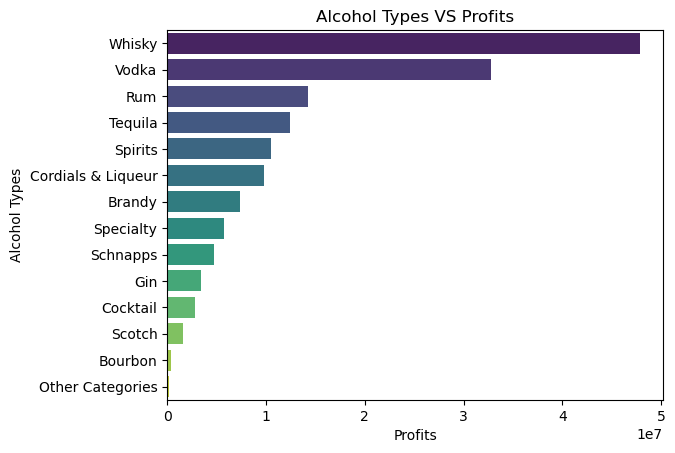

In [14]:
profit_by_type = df8.groupby('Alcohol_Type')['profit'].sum().reset_index()

# Order the DataFrame by profit in descending order
profit_by_type = profit_by_type.sort_values(by='profit', ascending=False)

plt.figure()
sns.barplot(x='profit', y='Alcohol_Type', data=profit_by_type, palette='viridis')

# Customize the plot
plt.title('Alcohol Types VS Profits')
plt.xlabel('Profits')
plt.ylabel('Alcohol Types')

# Show the plot
plt.show()

Whisky is the most profitable alcohol category, showing significantly higher profits compared to the other types. Vodka is the second most profitable, with profits around the 600,000 units mark.
Specialty, Schnapps, and Gin have lower profits compared to the previously mentioned categories, with profits seemingly between 100,000 and 200,000 dollars.
Scotch, Bourbon, and Other Categories are the least profitable. 
The 'Other Categories' appears to be the least profitable among all the categories listed.

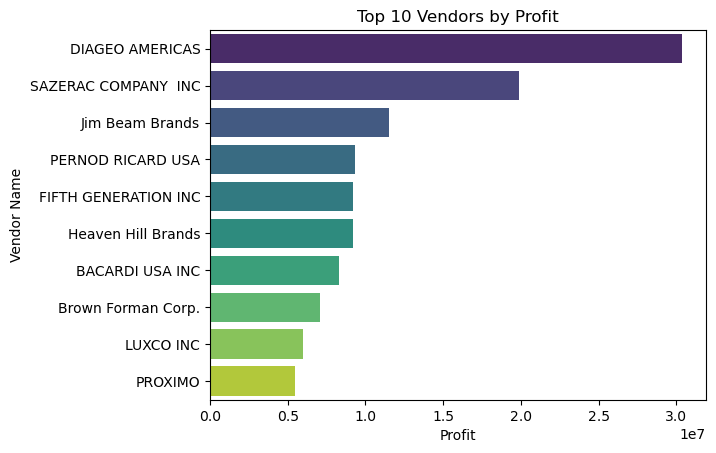

In [15]:
profit_by_vendor = df8.groupby('vendor_name')['profit'].sum().reset_index()

# Order the DataFrame by profit in descending order
profit_by_vendor = profit_by_vendor.sort_values(by='profit', ascending=False)

# Select the top 10 vendors
top_10_vendors = profit_by_vendor.head(10)

# Create a bar plot for the top 10 vendors
plt.figure()
sns.barplot(x='profit', y='vendor_name', data=top_10_vendors, palette='viridis')

# Customize the plot
plt.title('Top 10 Vendors by Profit')
plt.xlabel('Profit')
plt.ylabel('Vendor Name')
plt.show()

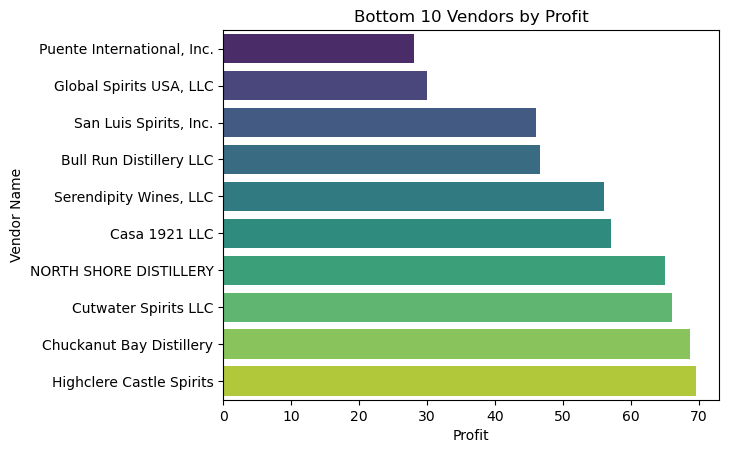

In [16]:
profit_by_vendor = profit_by_vendor.sort_values(by='profit', ascending=True)

# Select the top 10 vendors
Bottom_10_vendors = profit_by_vendor.head(10)

plt.figure()
sns.barplot(x='profit', y='vendor_name', data=Bottom_10_vendors, palette='viridis')

plt.title('Bottom 10 Vendors by Profit')
plt.xlabel('Profit')
plt.ylabel('Vendor Name')
plt.show()

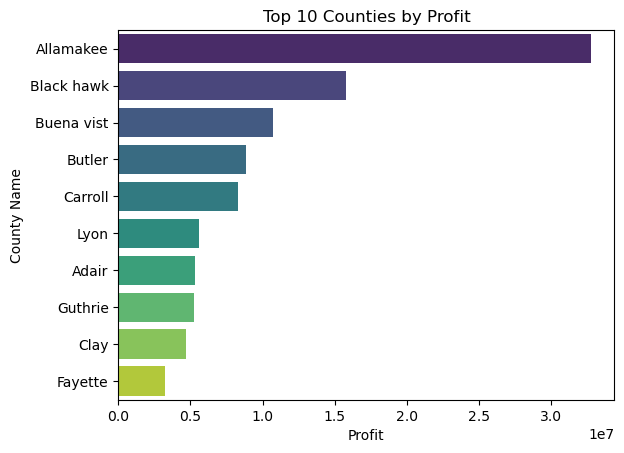

In [18]:
profit_by_county = df8.groupby('county')['profit'].sum().reset_index()
profit_by_county= profit_by_county.sort_values(by='profit', ascending=False)

# Select the top 10 vendors
top_10_county = profit_by_county.head(10)

# Create a bar plot for the top 10 vendors
plt.figure()
sns.barplot(x='profit', y='county', data=top_10_county, palette='viridis')

# Customize the plot
plt.title('Top 10 Counties by Profit')
plt.xlabel('Profit')
plt.ylabel('County Name')
plt.show()

###

### New Column-Month and Day and Week

In [19]:
# Convert the 'date' column to datetime
df8['date'] = pd.to_datetime(df8['date'])

# Extract day, month, and week into new columns
df8['day'] = df8['date'].dt.day
df8['month'] = df8['date'].dt.month
df8['week'] = df8['date'].dt.week

In [20]:
#sanity Check
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805303 entries, 0 to 2805302
Data columns (total 28 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   invoice_and_item_number  object        
 1   date                     datetime64[ns]
 2   store_number             int64         
 3   store_name               object        
 4   address                  object        
 5   city                     object        
 6   zip_code                 float64       
 7   county_number            float64       
 8   county                   object        
 9   category                 float64       
 10  category_name            object        
 11  vendor_number            float64       
 12  vendor_name              object        
 13  item_number              int64         
 14  item_description         object        
 15  pack                     int64         
 16  bottle_volume_ml         int64         
 17  state_bottle_cost        fl

Check data visually

In [21]:
profit_month=df8.groupby(['month'])['profit'].sum().reset_index()

In [22]:
profit_month.head()

,month,profit
0,1,18961399.17
1,2,9970366.42
2,3,12345048.79
3,4,11706898.52
4,5,11287632.19


#### Our dataset contains data from Jan 03 2021 to Jan 30 2022, therefore we need to divide the profit of Jan into 2.

In [23]:
# Divide the profit of the first month by 2
first_month_profit = profit_month.loc[profit_month['month'] == 1, 'profit'].values[0]
profit_month.loc[profit_month['month'] == 1, 'profit'] = first_month_profit / 2

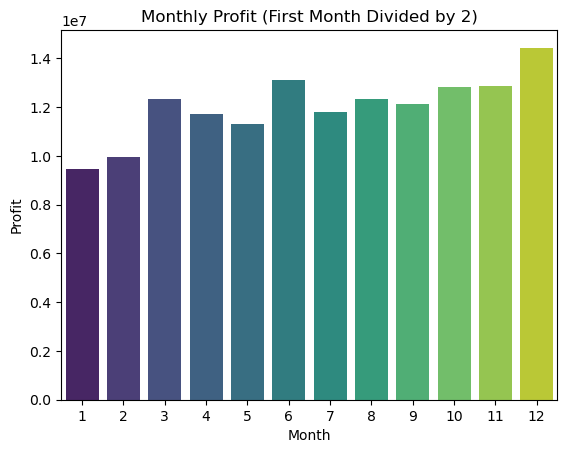

In [24]:
# Create a bar plot
plt.figure()
sns.barplot(x='month', y='profit', data=profit_month, palette='viridis')

# Customize the plot
plt.title('Monthly Profit (First Month Divided by 2)')
plt.xlabel('Month')
plt.ylabel('Profit')

plt.show()

The business experiences a seasonal increase in profits, particularly strong in the latter part of the year, potentially due to holiday sales or other end-of-year activities. 
There appears to be an increasing trend in profit from the second month to the last. The profit rises moderately from February to July, after which there is a more noticeable increase from August to December. This pattern suggests a seasonal trend where profits increase in the second half of the year.

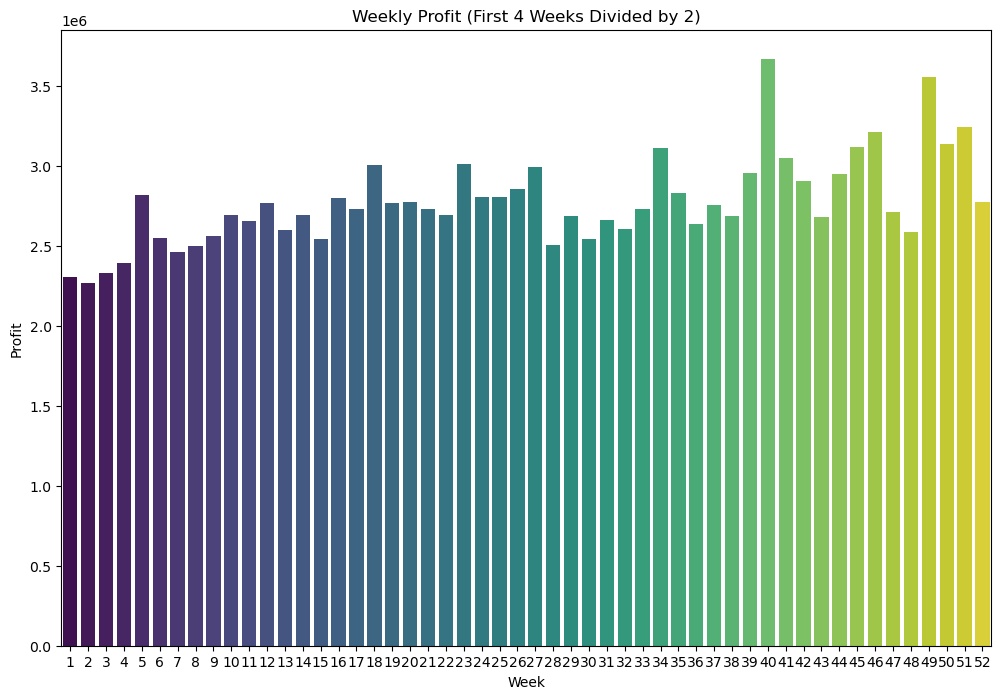

In [25]:
# Calculate weekly profit
profit_week = df8.groupby(['week'])['profit'].sum().reset_index()

# Divide the profit of the first 4 weeks by 2
first_4_weeks_profit = profit_week.loc[profit_week['week'].isin(range(1, 5)), 'profit']
profit_week.loc[profit_week['week'].isin(range(1, 5)), 'profit'] = first_4_weeks_profit / 2

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='week', y='profit', data=profit_week, palette='viridis')

# Customize the plot
plt.title('Weekly Profit (First 4 Weeks Divided by 2)')
plt.xlabel('Week')
plt.ylabel('Profit')

# Show the plot
plt.show()

There is considerable fluctuation in weekly profit throughout the year. There is a notable increase in profit around the middle of the year, particularly in weeks 26 through 30. We found that in week 26, there was Independence Day for the United States(July.4th).In addition, there is a significant increase towards the end of the year, from week 39 onwards, with the peak in week 43. Week 43 was the week for Halloween.The profit remains relatively high after this peak, which might correspond with continued holiday sales or other year-end factors.

###

### Dummy Variables for Volume

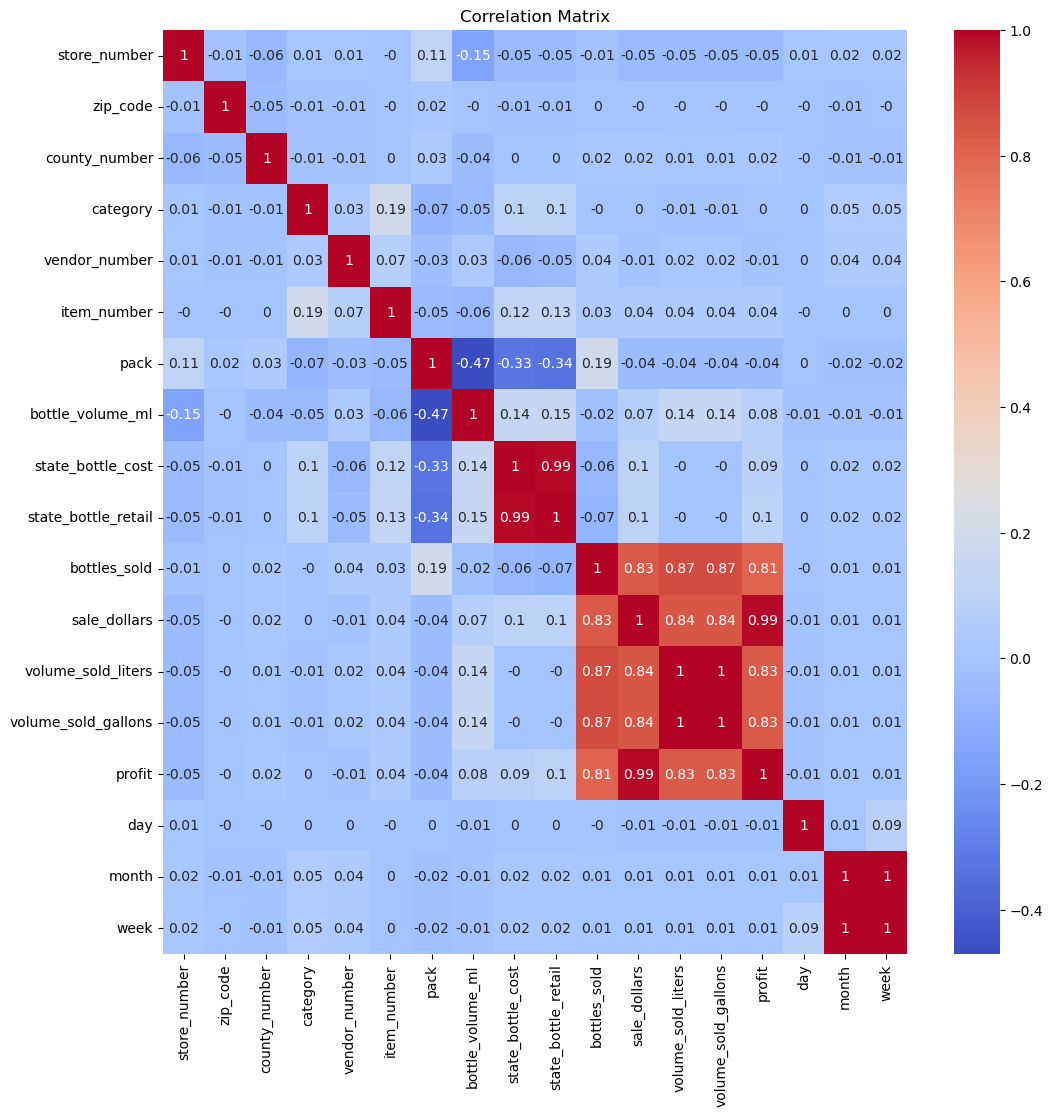

In [26]:
plt.figure(figsize=(12, 12))
corr_matrix = df8.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [27]:
df8['volume_sold_liters'].unique()

array([4.80000e+00, 3.00000e+00, 1.05000e+01, 9.00000e+00, 1.50000e+00,
       4.50000e+00, 4.00000e-01, 5.25000e+01, 1.20000e+01, 2.25000e+00,
       1.10000e-01, 2.00000e+00, 9.60000e+00, 7.20000e-01, 2.40000e+01,
       1.92000e+01, 5.25000e+00, 3.15000e+01, 2.25000e+01, 3.75000e+00,
       8.00000e-02, 6.00000e-01, 3.40000e-01, 1.10000e+00, 1.05000e+02,
       1.75000e+00, 2.30000e-01, 3.60000e+01, 6.00000e+00, 8.00000e-01,
       3.00000e-01, 1.80000e+01, 1.20000e+02, 7.00000e+00, 3.50000e+00,
       6.00000e+01, 4.00000e-02, 1.87000e+00, 2.00000e-01, 5.00000e-01,
       2.10000e+01, 4.00000e+00, 8.80000e+00, 4.50000e+01, 1.00000e+00,
       2.62000e+00, 2.40000e+00, 1.20000e+00, 4.20000e+01, 1.35000e+01,
       2.40000e+02, 1.68000e+02, 3.84000e+01, 2.88000e+01, 1.60000e+00,
       5.00000e+00, 8.40000e+01, 4.80000e+01, 7.50000e+00, 1.57500e+02,
       8.75000e+00, 6.30000e+01, 2.70000e+01, 4.09000e+00, 9.00000e-01,
       5.25000e+02, 9.00000e+01, 1.10000e+01, 1.80000e+00, 7.350

In [28]:
array = np.array([8.0000e-02, 1.0500e+01, 1.5000e+00, 5.0000e-01, 8.8000e+00,
       4.8000e+01, 4.0000e-02, 4.5000e+00, 9.0000e+00, 1.0000e+00,
       3.0000e+00, 3.6000e+01, 3.1500e+01, 5.2500e+00, 2.1000e+01,
       9.6000e+00, 7.2000e-01, 1.8700e+00, 1.1000e+00, 1.2000e+01,
       6.0000e+01, 2.2500e+00, 3.5000e+00, 9.4500e+01, 2.0000e-01,
       5.2500e+01, 4.8000e+02, 3.0000e-01, 6.0000e+00, 2.0000e+00,
       3.4000e-01, 6.0000e-01, 2.7000e+01, 2.6250e+02, 1.8000e+01,
       1.4400e+01, 4.5000e+01, 2.4000e+01, 3.7500e+00, 1.1000e-01,
       2.4000e+00, 1.2000e+00, 1.7500e+00, 2.5000e+00, 5.0000e+00,
       1.8000e+02, 6.7500e+00, 6.3000e+01, 7.3500e+01, 4.0000e+00,
       2.3000e-01, 4.2000e+01, 8.0000e-01, 1.1250e+02, 1.2600e+02,
       4.8000e+00, 4.0000e-01, 1.3500e+01, 2.1000e+02, 8.2500e+00,
       1.8000e+00, 1.1550e+02, 3.8400e+01, 3.3600e+01, 9.0000e+01,
       5.4000e+01, 1.6000e+00, 1.5750e+01, 3.6000e+00, 7.0000e+00,
       1.4000e+00, 1.3650e+02, 1.3500e+02, 2.2500e+01, 8.7500e+00,
       4.2000e+02, 5.7000e+00, 3.9600e+02, 9.6000e+01, 7.2000e+01,
       1.9200e+01, 7.5000e+00, 8.4000e+01, 1.0800e+02, 3.3700e+00,
       2.1600e+02, 3.4650e+02, 1.2000e+02, 2.7300e+02, 1.8750e+01,
       1.0500e+02, 1.7850e+02, 1.5750e+02, 2.8350e+02, 2.6200e+00,
       5.2800e+02, 4.5150e+02, 2.8800e+01, 1.6800e+02, 3.1500e+02,
       5.4000e+00, 1.4400e+02, 2.4000e+02, 6.3000e+02, 1.0800e+01,
       2.8000e+00, 5.7600e+01, 5.6200e+00, 2.5200e+02, 5.1000e+00,
       3.2000e+00, 1.2150e+02, 6.6000e+02, 4.0500e+02, 1.4700e+02,
       4.6200e+02, 6.7500e+01, 7.0000e-01, 2.2500e+02, 8.1000e+01,
       1.0500e+03, 5.8800e+02, 8.6100e+02, 8.4000e+02, 9.4500e+02,
       1.5300e+02, 4.0500e+01, 1.9950e+02, 3.6000e+02, 5.2500e+02,
       3.9900e+02, 9.8700e+02, 5.8500e+01, 8.0000e+00, 2.0250e+01,
       5.2000e+00, 2.2050e+02, 1.1250e+01, 4.2000e+00, 1.1400e+01,
       9.7500e+00, 2.1600e+01, 1.8900e+02, 1.6200e+02, 1.3200e+04,
       1.1000e+01, 5.0400e+02, 1.8900e+03, 1.2500e+00, 2.3400e+02,
       7.6800e+02, 2.8800e+02, 1.3200e+03, 4.5000e+02, 9.9000e+01,
       3.0000e+01, 1.1520e+02, 1.4250e+01, 5.9500e+01, 5.3550e+02,
       1.3200e+02, 4.7250e+02, 3.0000e+02, 2.9000e+01, 4.3200e+01,
       1.0350e+02, 8.5900e+00, 6.3700e+00, 1.7000e+00, 1.8375e+03,
       1.4000e+01, 3.3300e+02, 1.8060e+03, 1.0080e+03, 2.7000e+02,
       7.8000e+02, 1.9200e+02, 5.5000e-01, 2.3000e+01, 2.8500e+01,
       1.6485e+03, 5.1000e+01, 1.4175e+03, 1.1280e+03, 2.5500e+00,
       3.1200e+02, 2.6400e+02, 4.0900e+00, 3.6750e+02, 8.4000e+00,
       1.0185e+03, 1.5300e+01, 2.7000e+00, 1.1700e+02, 4.8700e+00,
       3.3075e+03, 2.2000e+00, 2.0000e-02, 4.5500e+01, 7.1750e+01,
       3.7800e+02])

# Set NumPy printing options to display numbers with fixed decimals
np.set_printoptions(precision=4, suppress=True)

In [29]:
print(array)

[    0.08    10.5      1.5      0.5      8.8     48.       0.04     4.5
     9.       1.       3.      36.      31.5      5.25    21.       9.6
     0.72     1.87     1.1     12.      60.       2.25     3.5     94.5
     0.2     52.5    480.       0.3      6.       2.       0.34     0.6
    27.     262.5     18.      14.4     45.      24.       3.75     0.11
     2.4      1.2      1.75     2.5      5.     180.       6.75    63.
    73.5      4.       0.23    42.       0.8    112.5    126.       4.8
     0.4     13.5    210.       8.25     1.8    115.5     38.4     33.6
    90.      54.       1.6     15.75     3.6      7.       1.4    136.5
   135.      22.5      8.75   420.       5.7    396.      96.      72.
    19.2      7.5     84.     108.       3.37   216.     346.5    120.
   273.      18.75   105.     178.5    157.5    283.5      2.62   528.
   451.5     28.8    168.     315.       5.4    144.     240.     630.
    10.8      2.8     57.6      5.62   252.       5.1      3.2    12

In [31]:
# Remove spaces from column names
df8.columns = df8.columns.str.replace(' ', '')

# Remove spaces from values in all columns
df8 = df8.apply(lambda x: x.str.replace(' ', '') if x.dtype == "object" else x)

In [32]:
df8['volume_sold_liters'].unique()

array([    4.8 ,     3.  ,    10.5 ,     9.  ,     1.5 ,     4.5 ,
           0.4 ,    52.5 ,    12.  ,     2.25,     0.11,     2.  ,
           9.6 ,     0.72,    24.  ,    19.2 ,     5.25,    31.5 ,
          22.5 ,     3.75,     0.08,     0.6 ,     0.34,     1.1 ,
         105.  ,     1.75,     0.23,    36.  ,     6.  ,     0.8 ,
           0.3 ,    18.  ,   120.  ,     7.  ,     3.5 ,    60.  ,
           0.04,     1.87,     0.2 ,     0.5 ,    21.  ,     4.  ,
           8.8 ,    45.  ,     1.  ,     2.62,     2.4 ,     1.2 ,
          42.  ,    13.5 ,   240.  ,   168.  ,    38.4 ,    28.8 ,
           1.6 ,     5.  ,    84.  ,    48.  ,     7.5 ,   157.5 ,
           8.75,    63.  ,    27.  ,     4.09,     0.9 ,   525.  ,
          90.  ,    11.  ,     1.8 ,    73.5 ,     3.2 ,    33.6 ,
           3.37,    72.  ,   136.5 ,    14.4 ,     1.25,    81.  ,
           4.2 ,   115.5 ,    54.  ,     1.4 ,   300.  ,   180.  ,
         210.  ,     6.75,   315.  ,   262.5 ,   540.  ,   945

#### Lets group the volumes into 6 groups manually:
-We will assign 0-10 liter number 1;

-assign 10.01-50 L with number 2;

-assign 50.01-100 L with number 3;

-assign 100.01-200 L with number 4;

-assign 200.01-1000 L with number 5.

-assign > 1000.01 L with number 6.

In [35]:
replace_mapping1 = {
 4.8 :1,     3.  :1,    10.5 :2,     9.  :1,     1.5 :1,     4.5 :1,
           0.4 :1,    52.5 :3,    12.  :2,     2.25:1,     0.11:1,     2.  :1,
           9.6 :1,     0.72:1,    24.  :2,    19.2 :2,     5.25:1,    31.5 :2,
          22.5 :2,     3.75:1,     0.08:1,     0.6 :1,     0.34:1,     1.1 :1,
         105.  :4,     1.75:1,     0.23:1,    36.  :2,     6.  :1,     0.8 :1,
           0.3 :1,    18.  :2,   120.  :4,     7.  :1,     3.5 :1,    60.  :3,
           0.04:1,     1.87:1,     0.2 :1,     0.5 :1,    21.  :2,     4.  :1,
           8.8 :1,    45.  :2,     1.  :1,     2.62:1,     2.4 :1,     1.2 :1,
          42.  :2,    13.5 :2,   240.  :5,   168.  :4,    38.4 :2,    28.8 :2,
           1.6 :1,     5.  :1,    84.  :3,    48.  :2,     7.5 :1,   157.5 :4,
           8.75:1,    63.  :3,    27.  :2,     4.09:1,     0.9 :1,   525.  :5,
          90.  :3,    11.  :2,     1.8 :1,    73.5 :3,     3.2 :1,    33.6 :2,
           3.37:1,    72.  :3,   136.5 :4,    14.4 :2,     1.25:1,    81.  :3,
           4.2 :1,   115.5 :4,    54.  :3,     1.4 :1,   300.  :5,   180.  :4,         
         210.  :5,     6.75:1,   315.  :5,   262.5 :5,   540.  :5,   945.  :5,
         135.  :4,     8.  :1,     5.62:1,   198.  :4,    99.  :3,   126.  :4,       
           38.5 :2,    94.5 :3,     2.6 :1,     0.02:1,   420.  :5,   261.  :5,
           4.87:1,   514.5 :5,   768.  :5,    15.  :2,     2.5:1,     4.4 :1,
         306.  :5,   144.  :4,   153.  :4,   132.  :4,    30.  :2,   720.  :5,   
         2.8 :1,    96.  :3,    50.75:3,   147.  :4,   360.  :5,     8.25:1,
         528.  :5,   660.  :5,   108.  :4,    57.6 :3,   225.  :5,   504.  :5,
           7.2 :1,   546.  :5,   189.  :4,   216.  :5,   162.  :4,   600.  :5,
         220.5 :5,   630.  :5,   252.  :5,   241.5 :5,    19.5 :2,   480.  :5,
          62.4 :3,     3.6 :1,     0.65:1,   283.5 :5,   117.  :4,    25.5 :2,
         312.  :5,     5.6 :1,   294.  :5,   325.5 :5,    22.6 :2,    11.25:2,
          52.8 :3,   178.5 :4,   199.5 :4,  1008.  :6,   432.  :5,  1890.  :6,
        1056.  :6,   472.5 :5,  5197.5 :6,   273.  :5,     8.59:1,   960.  :5,
         336.  :5,    10.  :1,    40.5 :2,   423.  :5,   231.  :5,    31.  :2,
          12.75:2,    67.5 :3,   672.  :5,  1344.  :6,    40.  :2,     7.87:1,
           0.55:1,   192.  :4,     5.4 :1,     0.45:1,   202.5 :5,   576.  :5,
        1200.  :6,    57.  :3,  1050.  :6,     5.1 :1,   324.  :5,   511.  :5,
         158.  :4,   138.  :4,    66.5 :3,   723.6 :5,    39.  :2,     5.7 :1,
        1980.  :6,   112.5 :4,     6.4 :1,    10.8 :2,    16.2 :2,    16.  :2,
         113.25:4,    41.25:2,    28.5 :2,    32.4 :2,   288.  :5,  6615.  :6,
          14.  :2,     4.6 :1,     1.7 :1,   104.4 :4,     0.7 :1,   682.5 :5,
        1260.  :6,    13.6 :2,     2.2 :1,     0.85:1,    78.75:3,    10.2 :2,
        2835.  :6,    87.5 :3,  1575.  :6,    20.25:2,  1155.  :6,    17.6 :2}

In [38]:
replace_mapping2 = {367.5 :5,   129.  :4,   304.5 :5,   828.  :5,     0.95:1,   388.5 :5,
          11.4 :2,   204.  :5,     3.8 :1,   264.  :5,    26.25:2,   735.  :5,
          75.  :3,   900.  :5,   609.  :5,     6.37:1,    76.8 :3,  1680.  :6,
         840.  :5,   462.  :5,    22.  :2,    67.2 :3,    15.75:2,     2.7 :1,
          11.2 :2,    45.5 :2,    43.2 :2,    59.  :3,     1.9 :1,    35.  :2,
         148.5 :4,    81.6 :3,   270.  :5,   997.5 :5,     2.85:1,   535.5 :5,         
         399.  :5,     1.05:1,   139.5 :4,    25.  :2,    76.5 :3,    39.75:2,
           7.12:1,     5.2 :1,   948.  :5,   556.5 :5,  3150.  :5,   322.  :5,
        2205.  :6,    59.5 :3,   224.  :5,    66.  :3,   102.  :4,   115.2 :4,
        1094.  :6,     5.35:1,  1320.  :6,  1140.  :6,   133.  :4,   984.  :5,
        1386.  :6,    47.25:2,  3539.  :6,   181.  :4,  2304.  :5,  3465.  :5,
         567.  :5,  1536.  :6,  1044.  :6,   693.  :5,  3072.  :5,     0.48:1,
        1176.  :6,     3.3 :1,   882.  :5,   756.  :5,    38.25:2,  1018.5 :5, 
         127.  :4,   122.5 :4,   372.  :5,    45.9 :2,    88.5 :3,   101.5 :4,
         624.  :5,   100.  :3,  1858.5 :6,   351.  :5,   443.  :5,   245.  :5,
         123.75:4,   732.  :5,   269.5 :5,   675.  :5,  2760.  :6,   639.  :5,
       11880.  :6,    51.75:3,  2700.  :6,  3600.  :6,  2475.  :6,  1350.  :6,
        2160.  :6,  1449.  :6,  1278.  :6,   549.  :5,   258.  :5,   261.75:5,
         657.  :5,  3024.  :6,  1485.  :6,   804.  :5,   980.  :5,   328.5 :5,
         120.75:4,  1920.  :6,   160.5 :4,     6.2 :1,  4032.  :6,    53.4 :3,
         227.25:5,  2173.5 :6,    73.  :3,    70.5 :3,  1911.  :6,   385.  :5,
         337.75:5,   183.75:4,    87.  :3,    71.  :3,   128.  :4,    50.  :2,
          99.75:3,  1228.5 :6,    60.3 :3,     4.25:1,    71.25:3,   198.75:5,
          64.8 :3,     3.25:1,   112.  :4,   702.  :5,   200.  :4,   143.5 :4,
         180.25:4,    18.4 :2,   502.25:5,   792.75:5,   192.5 :4,   307.  :5,
        5376.  :6,   971.25:5,  2677.5 :6,   229.25:5,     9.37:1,  2142.  :6,
         196.5 :4,    98.  :3,  1434.  :6,   152.  :4,   215.25:5,   594.  :5,
         253.75:5,   193.5 :4,   722.75:5,   134.4 :4,   110.  :4,   648.  :5,
          88.  :3,   808.5 :5,   522.  :5,     7.4 :1,    33.75:1,   260.75:5,
        1060.5 :6,   230.4 :5,   356.  :5,  1956.  :6,   165.  :4,    91.  :3,
        1012.5 :6,    50.25:3,   184.5 :4,   248.4 :5,    35.57:2,   564.  :5,
          90.75:3,   476.  :5,   271.25:5,   621.25:5,  1002.75:6
}

In [41]:
replace_mapping3 = {
         346.5 :5,   364.  :5,     2.55:1,    21.6 :2,   705.25:5,   892.5 :5,
          58.5 :3,  1071.  :6,    12.25:2,    86.4 :3,   441.  :5,    44.25:2,
          11.05:2,   987.  :5,  2016.  :6,    43.5 :2,     1.3 :1,    89.25:3,
         45.75:2,   213.75:5,   239.  :5,    24.75:2, 13200.  :6,    54.75:3,
          40.25:2,   297.  :5,  2068.5 :6,     3.35:1,   708.  :5,    64.75:3,
          61.  :3,   201.25:5,    47.  :2,    23.25:2,   427.5 :5,    43.  :2,
        2625.  :6,     7.8 :1,   150.5 :4,    22.75:2,   488.  :5,  2362.5 :5,
          15.3 :2,    16.8 :2,   243.  :5,   661.5 :5,   164.5 :4,  5670.  :5,
         450.  :5,     3.9 :1,   495.  :5,   408.  :5,    17.  :2,   171.  :4,
         378.  :5,   131.  :4,   156.  :4,  1785.  :6,  2058.  :6,     8.2 :1,
         357.  :5,   166.25:4,   282.  :5,   955.5 :5,   108.75:4,   451.5 :5,
         121.5 :4,   279.  :5,    11.6 :2,    64.5 :3,   572.  :5,   207.  :5,
         228.  :5,    36.55:2,    19.25:2,   810.  :5,   792.  :5,    51.  :3,
        1365.  :6,    34.5 :2,  1004.5 :6,  2100.  :6,   290.  :5,  1500.  :6,
         888.  :5,    57.75:3,     9.75:1,   103.5 :4,   175.5 :4,    27.75:2,
        4725.  :6,    16.5 :2,   319.  :5,  1417.5 :6,   396.  :5,    49.5 :2,
         456.  :5,   236.25:5,   816.  :5,    56.  :3,  1656.  :6,   588.  :5,
        1020.  :5,   477.75:5,   302.75:5,    85.5 :3,    75.25:3,     6.8 :1,
         787.5 :5,   780.  :5,    71.75:3,    36.75:2,   577.5 :5,    80.  :3,
          37.  :2,   409.5 :5,    12.06:2,    33.  :2,   405.  :5,    28.  :2,
         589.5 :5,    17.5 :2,   493.5 :5,    25.12:2,    17.25:2,   483.  :5,
          24.8 :2,    74.  :3,     5.8 :1,  1806.  :6,   861.  :5,  1207.5 :6,
        3780.  :6,  1512.  :6,    22.4 :2,   924.  :5,   166.5 :4,    38.  :2,
          82.25:3,   161.  :4,    70.  :3,    17.1 :2,     5.5 :1,    30.6 :2,
         217.  :5,   333.  :5,   197.75:4,   162.75:4,  1440.  :6,  5649.  :6,
           1.45:1,   798.  :5,   129.6 :4,   871.5 :5,  1942.5 :6,   172.8 :4,
         966.  :5,   486.  :5,   119.  :4,   913.5 :5,   619.5 :5,  1104.  :6,
         544.25:5,   148.8 :4,  2688.  :6,    80.25:3,    81.75:5,    23.  :2,
          12.6 :2,    18.75:2,  1564.5 :6,   276.  :5,  3307.5 :6,     8.4 :1,
         745.5 :5,     9.2 :1,  1039.5 :6,     7.6 :1,  1995.  :6,   400.75:5,
        3528.  :6,  1732.5 :6,   912.  :5,  1837.5 :6,   612.  :5,  1638.  :6,
         234.  :5,    92.  :3,  1197.  :6,   492.  :5,   384.  :5,    61.25:3}

In [43]:
replace_mapping4 = {
          37.5 :3,    78.  :3,   903.  :5,   196.  :4,   140.  :4,   274.75:5,
         342.  :5,  3759.  :6,    19.  :2,    20.  :2,  1080.  :6,   516.  :5,
         130.5 :4,   531.  :5,    58.  :3,    83.25:3,     3.1 :1,   397.25:5,
        3213.  :6,    33.25:2,    21.75:2,  1584.  :6,   266.  :5,   124.25:4,
          69.  :3,    93.  :3,   145.  :4,    29.25:2,     6.6 :1,    13.  :2,
         435.75:5,   740.25:5,   687.75:5,   976.5 :5,  1543.5 :6,    74.25:3,
         161.25:4,  4252.5 :6,     4.7 :1,  3675.  :6,    18.2 :2,    13.4 :2,
          13.45:2,    68.25:3,    49.  :2,  7116.  :6,   174.  :4,    45.6 :2,
          55.5 :3,    82.  :3,    77.  :3,  2005.5 :6,    86.  :3,    35.25:2,
        1606.5 :6,  2640.  :6,  1102.5 :6,   513.  :5,   598.5 :5,    80.5 :3,
          67.  :3,    30.75:2,   430.5 :5,  1800.  :6,    46.  :2,    20.4 :2,
          31.2 :2,    61.2 :3,    44.  :2,    66.75:3,  1312.5 :6,  1134.  :6,
           9.4 :1,    29.75:2,   124.8 :4,    14.25:2,    15.6 :2,   229.5 :5,
         714.  :5,    10.05:2,   552.  :5,    26.4 :2,  2047.5 :6,    62.  :3,
         229.  :5,   519.  :5,   190.5 :4,   194.4 :4,   286.5 :5,    79.  :3,
          32.25:2,  1236.  :6,   445.5 :5,    48.75:2,     1.55:1,   651.  :5,
          26.  :2,   703.5 :5,  6142.5 :6,  1648.5 :6, 11340.  :6,   167.25:4,
         248.5 :5,   337.5 :5,   141.75:4,   105.6 :4,    22.8 :2,    35.2 :2,
          32.  :2,    42.75:2,   636.  :5,   444.  :5,    39.9 :2,  1764.  :6,
        2520.  :6,  2026.5 :6,    17.62:2,   169.75:4,   299.  :5,    83.  :3,
        1029.  :6,    40.8 :2,  1128.  :6,    82.5 :3,    29.  :2,   585.  :5,
         150.  :4,   149.  :4,    97.5 :3,   510.  :5,   256.5 :5,    14.62:2,
         387.  :5,    23.8 :2,     6.03:1,   211.5 :5,    70.8 :3,   526.5 :5,
         744.  :5,     8.9 :1,   348.  :5,   496.5 :5,    61.5 :3,   434.  :5,
         169.5 :4,    96.25:3,   414.  :5,   695.  :5,   103.  :4,    62.25:3,
        1333.5 :6,     2.1 :1,   551.25:5,   308.  :5,   819.  :5,   603.75:5}

In [45]:
combined_mapping = {**replace_mapping1, **replace_mapping2, **replace_mapping3, **replace_mapping4}

In [46]:
df8['volume_sold_liters'] = df8['volume_sold_liters'].replace(combined_mapping)

In [47]:
df8['volume_sold_liters'].unique()

array([1., 2., 3., 4., 5., 6.])

In [48]:
#make a copy just in case
df9=df8.copy()

In [49]:
#Make outputs be integers
df9['volume_sold_liters'] = df9['volume_sold_liters'].astype(int)

In [50]:
#sanity check
df9['volume_sold_liters'].unique()

array([1, 2, 3, 4, 5, 6])

###

In [76]:
dummy_variables= pd.get_dummies(df9['volume_sold_liters'])

In [77]:
#use concat to add dummy columns to a new dataframe
df_new = pd.concat([df9, dummy_variables], axis=1)
#check if we succuessfully make dummy variables
df_new.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,...,profit,day,month,week,1,2,3,4,5,6
0,INV-33179700135,2021-01-04,2576,Hy-VeeWineandSpirits/StormLake,1250NLakeSt,StormLake,50588.0,11.0,Adair,1081600.0,...,21.60,4,1,1,1,0,0,0,0,0
1,INV-33196200106,2021-01-04,2649,Hy-Vee#3/Dubuque,400LocustSt,Dubuque,52001.0,31.0,Adair,1081200.0,...,23.00,4,1,1,1,0,0,0,0,0
2,INV-33184300011,2021-01-04,2539,Hy-VeeFoodStore/IowaFalls,640S.Oak,IowaFalls,50126.0,42.0,Adams,1031100.0,...,44.28,4,1,1,0,1,0,0,0,0
3,INV-33184100015,2021-01-04,4024,Wal-Mart1546/IowaFalls,840SOak,IowaFalls,50126.0,42.0,Adams,1031100.0,...,19.92,4,1,1,1,0,0,0,0,0
4,INV-33174200025,2021-01-04,5385,VineFood&Liquor,2704VineSt.,WestDesMoines,50265.0,77.0,Allamakee,1012200.0,...,21.00,4,1,1,1,0,0,0,0,0


In [78]:
df_new.rename(columns={1: 'volume_1', 2: 'volume_2', 3: 'volume_3', 4: 'volume_4', 5: 'volume_5', 6: 'volume_6'}, inplace=True)

Drop the columns we used for making new columns in order to reduce correlations between variables.

In [79]:
df_sub = df_new.drop(columns=['volume_sold_liters', 'sale_dollars', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold'])
df_sub

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,...,profit,day,month,week,volume_1,volume_2,volume_3,volume_4,volume_5,volume_6
0,INV-33179700135,2021-01-04,2576,Hy-VeeWineandSpirits/StormLake,1250NLakeSt,StormLake,50588.0,11.0,Adair,1081600.0,...,21.60,4,1,1,1,0,0,0,0,0
1,INV-33196200106,2021-01-04,2649,Hy-Vee#3/Dubuque,400LocustSt,Dubuque,52001.0,31.0,Adair,1081200.0,...,23.00,4,1,1,1,0,0,0,0,0
2,INV-33184300011,2021-01-04,2539,Hy-VeeFoodStore/IowaFalls,640S.Oak,IowaFalls,50126.0,42.0,Adams,1031100.0,...,44.28,4,1,1,0,1,0,0,0,0
3,INV-33184100015,2021-01-04,4024,Wal-Mart1546/IowaFalls,840SOak,IowaFalls,50126.0,42.0,Adams,1031100.0,...,19.92,4,1,1,1,0,0,0,0,0
4,INV-33174200025,2021-01-04,5385,VineFood&Liquor,2704VineSt.,WestDesMoines,50265.0,77.0,Allamakee,1012200.0,...,21.00,4,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805298,INV-41968600007,2021-11-14,4617,LicketyLiquor,2501HUBBELLAVE,DesMoines,50317.0,77.0,Allamakee,1022100.0,...,3.92,14,11,45,1,0,0,0,0,0
2805299,INV-41968600008,2021-11-14,4617,LicketyLiquor,2501HUBBELLAVE,DesMoines,50317.0,77.0,Allamakee,1022100.0,...,3.92,14,11,45,1,0,0,0,0,0
2805300,INV-41968600009,2021-11-14,4617,LicketyLiquor,2501HUBBELLAVE,DesMoines,50317.0,77.0,Allamakee,1031200.0,...,11.25,14,11,45,1,0,0,0,0,0
2805301,INV-41968600006,2021-11-14,4617,LicketyLiquor,2501HUBBELLAVE,DesMoines,50317.0,77.0,Allamakee,1022200.0,...,13.50,14,11,45,1,0,0,0,0,0


###

### Dummy Variables for Alcohol Type

In [80]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805303 entries, 0 to 2805302
Data columns (total 29 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   invoice_and_item_number  object        
 1   date                     datetime64[ns]
 2   store_number             int64         
 3   store_name               object        
 4   address                  object        
 5   city                     object        
 6   zip_code                 float64       
 7   county_number            float64       
 8   county                   object        
 9   category                 float64       
 10  category_name            object        
 11  vendor_number            float64       
 12  vendor_name              object        
 13  item_number              int64         
 14  item_description         object        
 15  pack                     int64         
 16  bottle_volume_ml         int64         
 17  volume_sold_gallons      fl

In [81]:
dummy_variable= pd.get_dummies(df_sub['Alcohol_Type'])

In [82]:
#use concat to add dummy columns to a new dataframe
df_n = pd.concat([df_sub, dummy_variable], axis=1)
#check if we succuessfully make dummy variables
df_n.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,...,Gin,OtherCategories,Rum,Schnapps,Scotch,Specialty,Spirits,Tequila,Vodka,Whisky
0,INV-33179700135,2021-01-04,2576,Hy-VeeWineandSpirits/StormLake,1250NLakeSt,StormLake,50588.0,11.0,Adair,1081600.0,...,0,0,0,0,0,0,1,0,0,0
1,INV-33196200106,2021-01-04,2649,Hy-Vee#3/Dubuque,400LocustSt,Dubuque,52001.0,31.0,Adair,1081200.0,...,0,0,0,0,0,0,0,0,0,0
2,INV-33184300011,2021-01-04,2539,Hy-VeeFoodStore/IowaFalls,640S.Oak,IowaFalls,50126.0,42.0,Adams,1031100.0,...,0,0,0,0,0,0,0,0,1,0
3,INV-33184100015,2021-01-04,4024,Wal-Mart1546/IowaFalls,840SOak,IowaFalls,50126.0,42.0,Adams,1031100.0,...,0,0,0,0,0,0,0,0,1,0
4,INV-33174200025,2021-01-04,5385,VineFood&Liquor,2704VineSt.,WestDesMoines,50265.0,77.0,Allamakee,1012200.0,...,0,0,0,0,0,0,0,0,0,1


In [83]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805303 entries, 0 to 2805302
Data columns (total 43 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   invoice_and_item_number  object        
 1   date                     datetime64[ns]
 2   store_number             int64         
 3   store_name               object        
 4   address                  object        
 5   city                     object        
 6   zip_code                 float64       
 7   county_number            float64       
 8   county                   object        
 9   category                 float64       
 10  category_name            object        
 11  vendor_number            float64       
 12  vendor_name              object        
 13  item_number              int64         
 14  item_description         object        
 15  pack                     int64         
 16  bottle_volume_ml         int64         
 17  volume_sold_gallons      fl

In [89]:
df_s = df_n.drop('Alcohol_Type', axis=1)

### Correlations

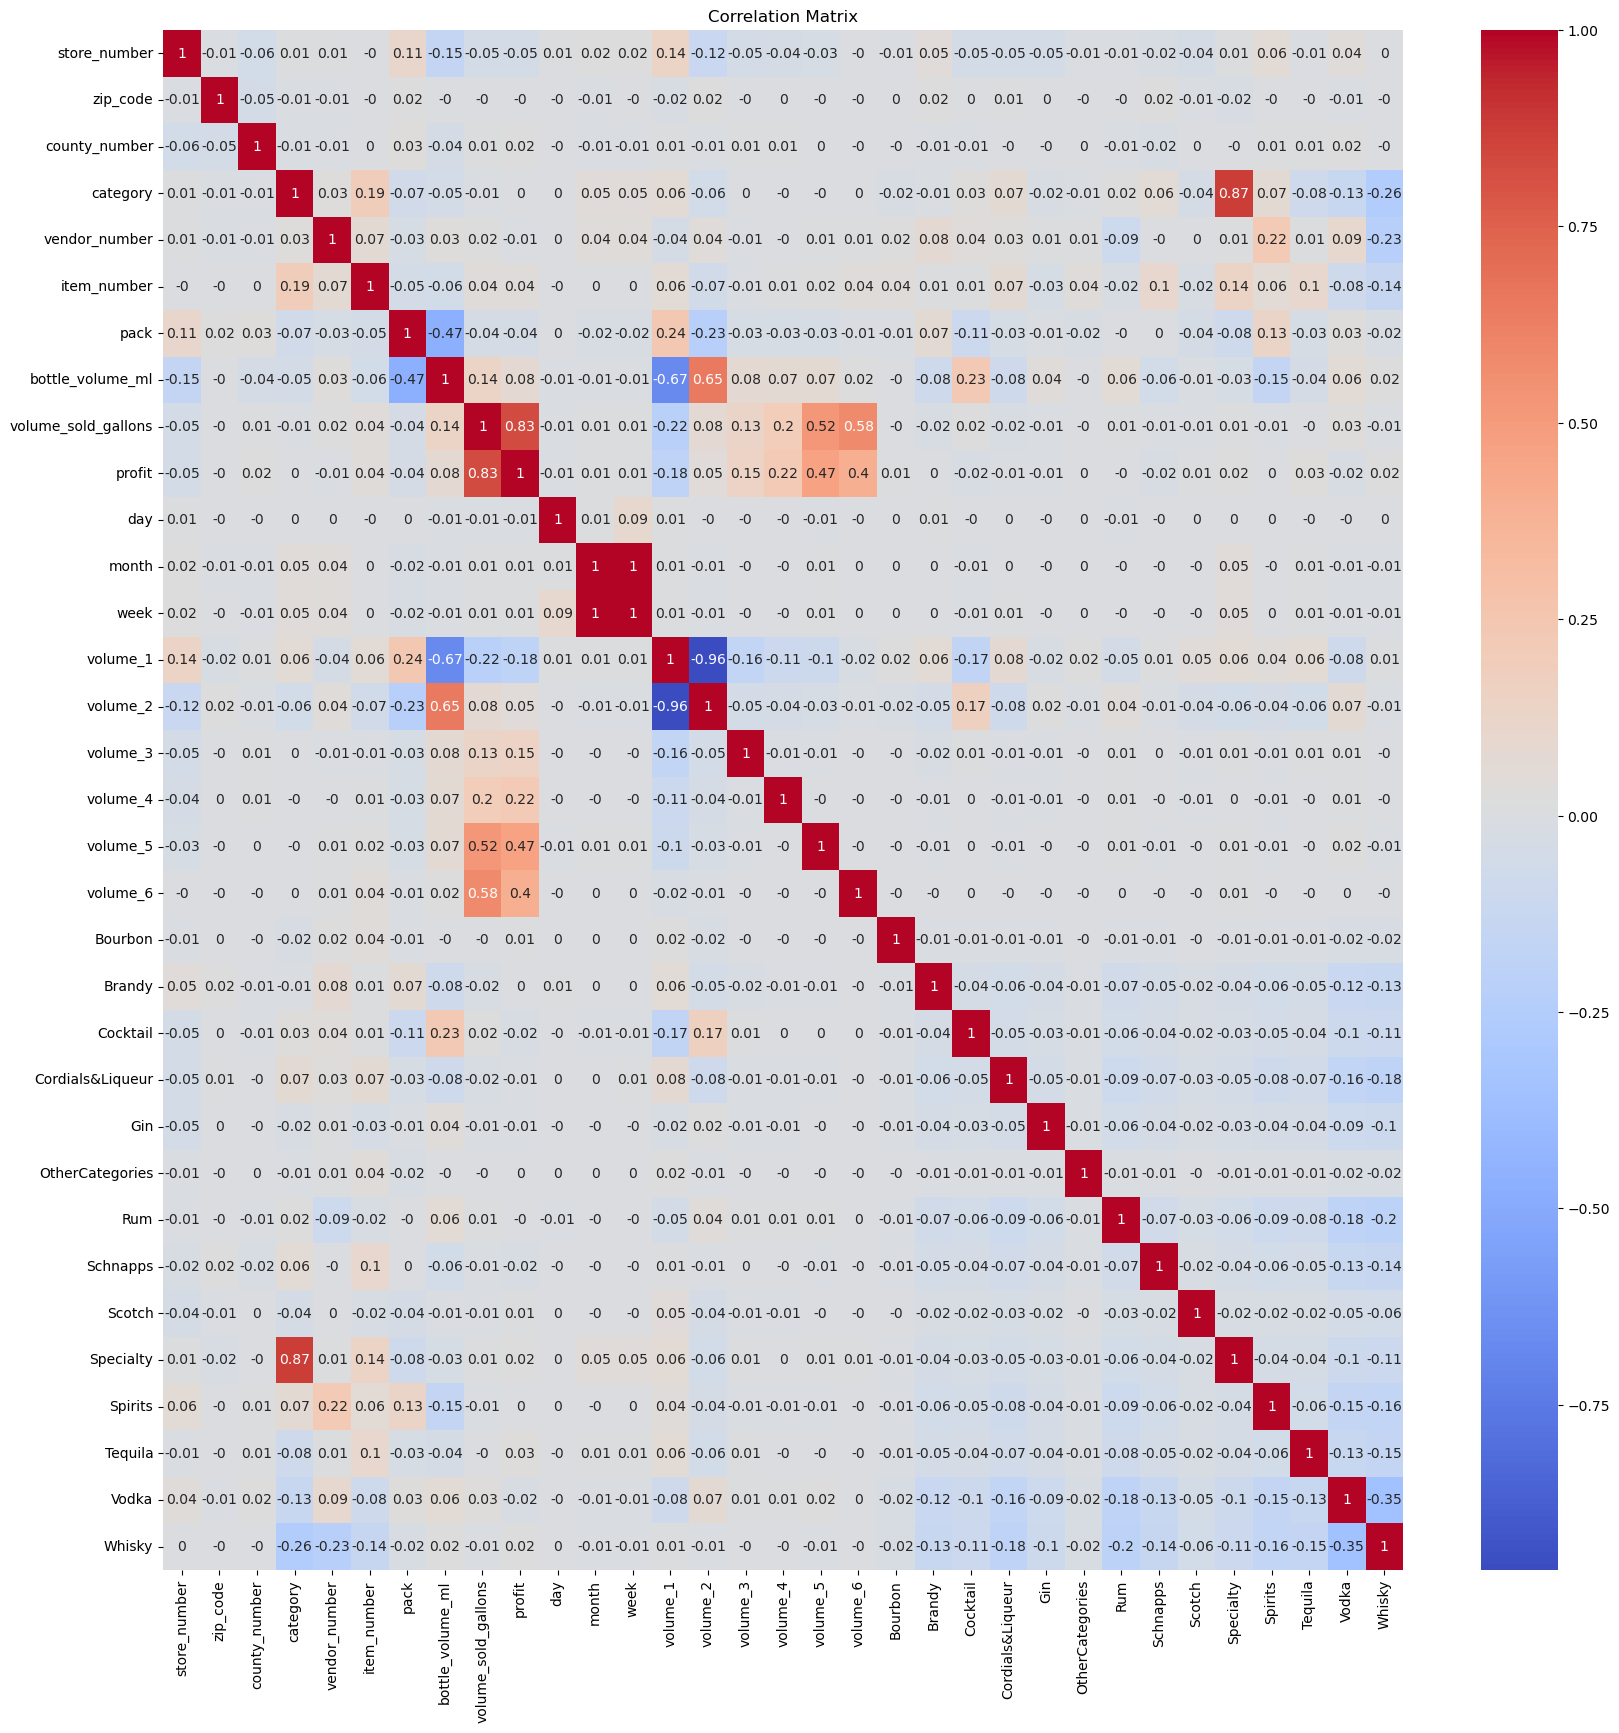

In [91]:
plt.figure(figsize=(20, 20))
corr_matrix = df_s.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Drop the columns with high correlations

In [92]:
df10=df_s.drop(columns=['volume_sold_gallons','month','volume_2','category'])

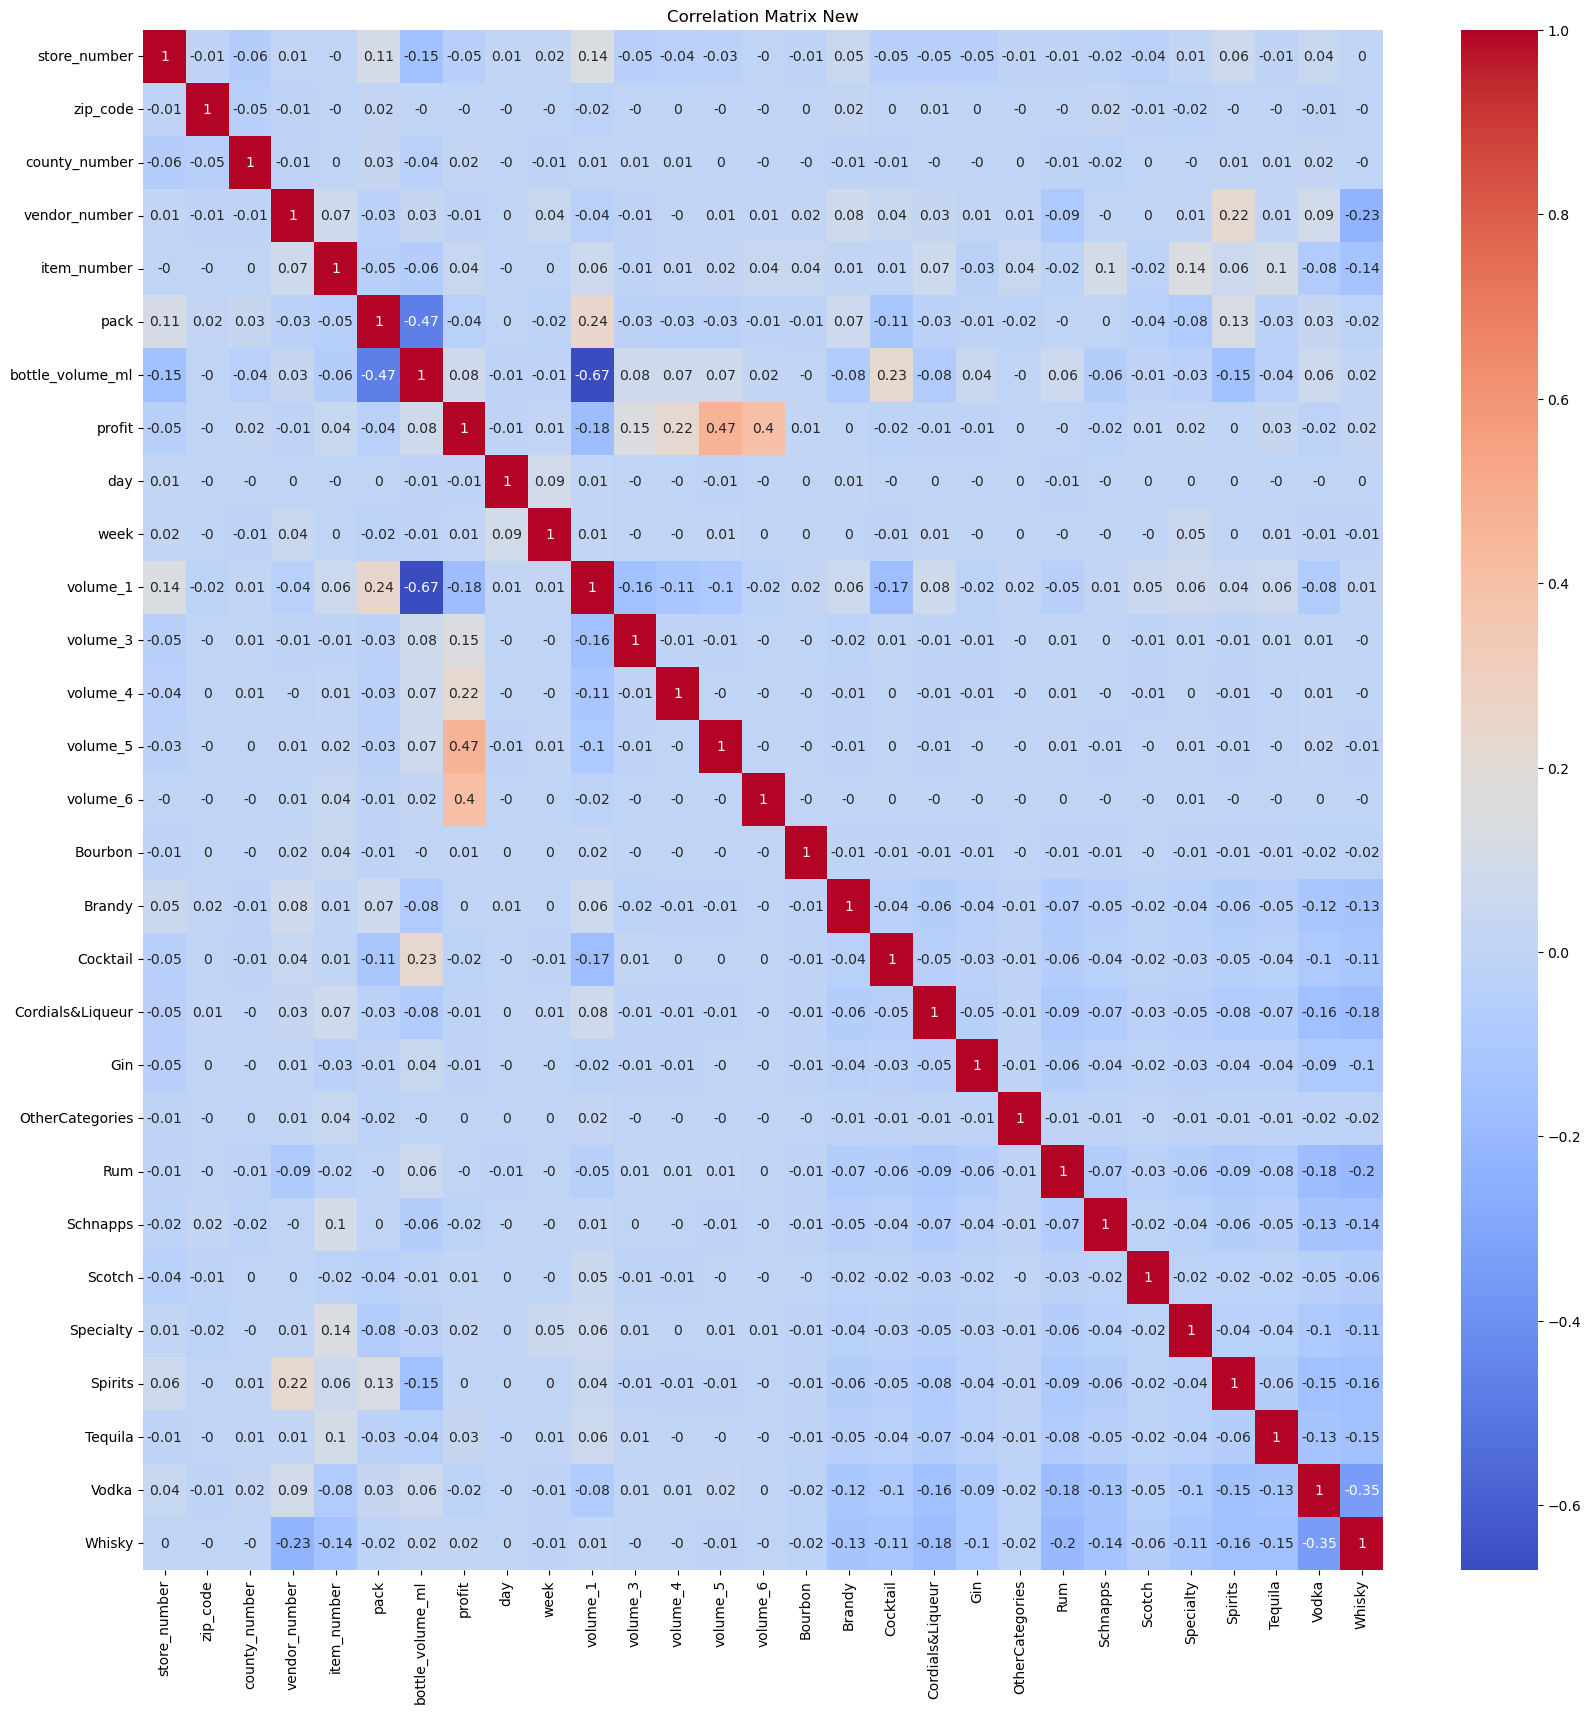

In [94]:
plt.figure(figsize=(20, 20))
corr_matrix = df10.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix New')
plt.show()

Drop the column with high correlation(over 0.65)

In [95]:
df11=df10.drop(columns=['volume_1'])

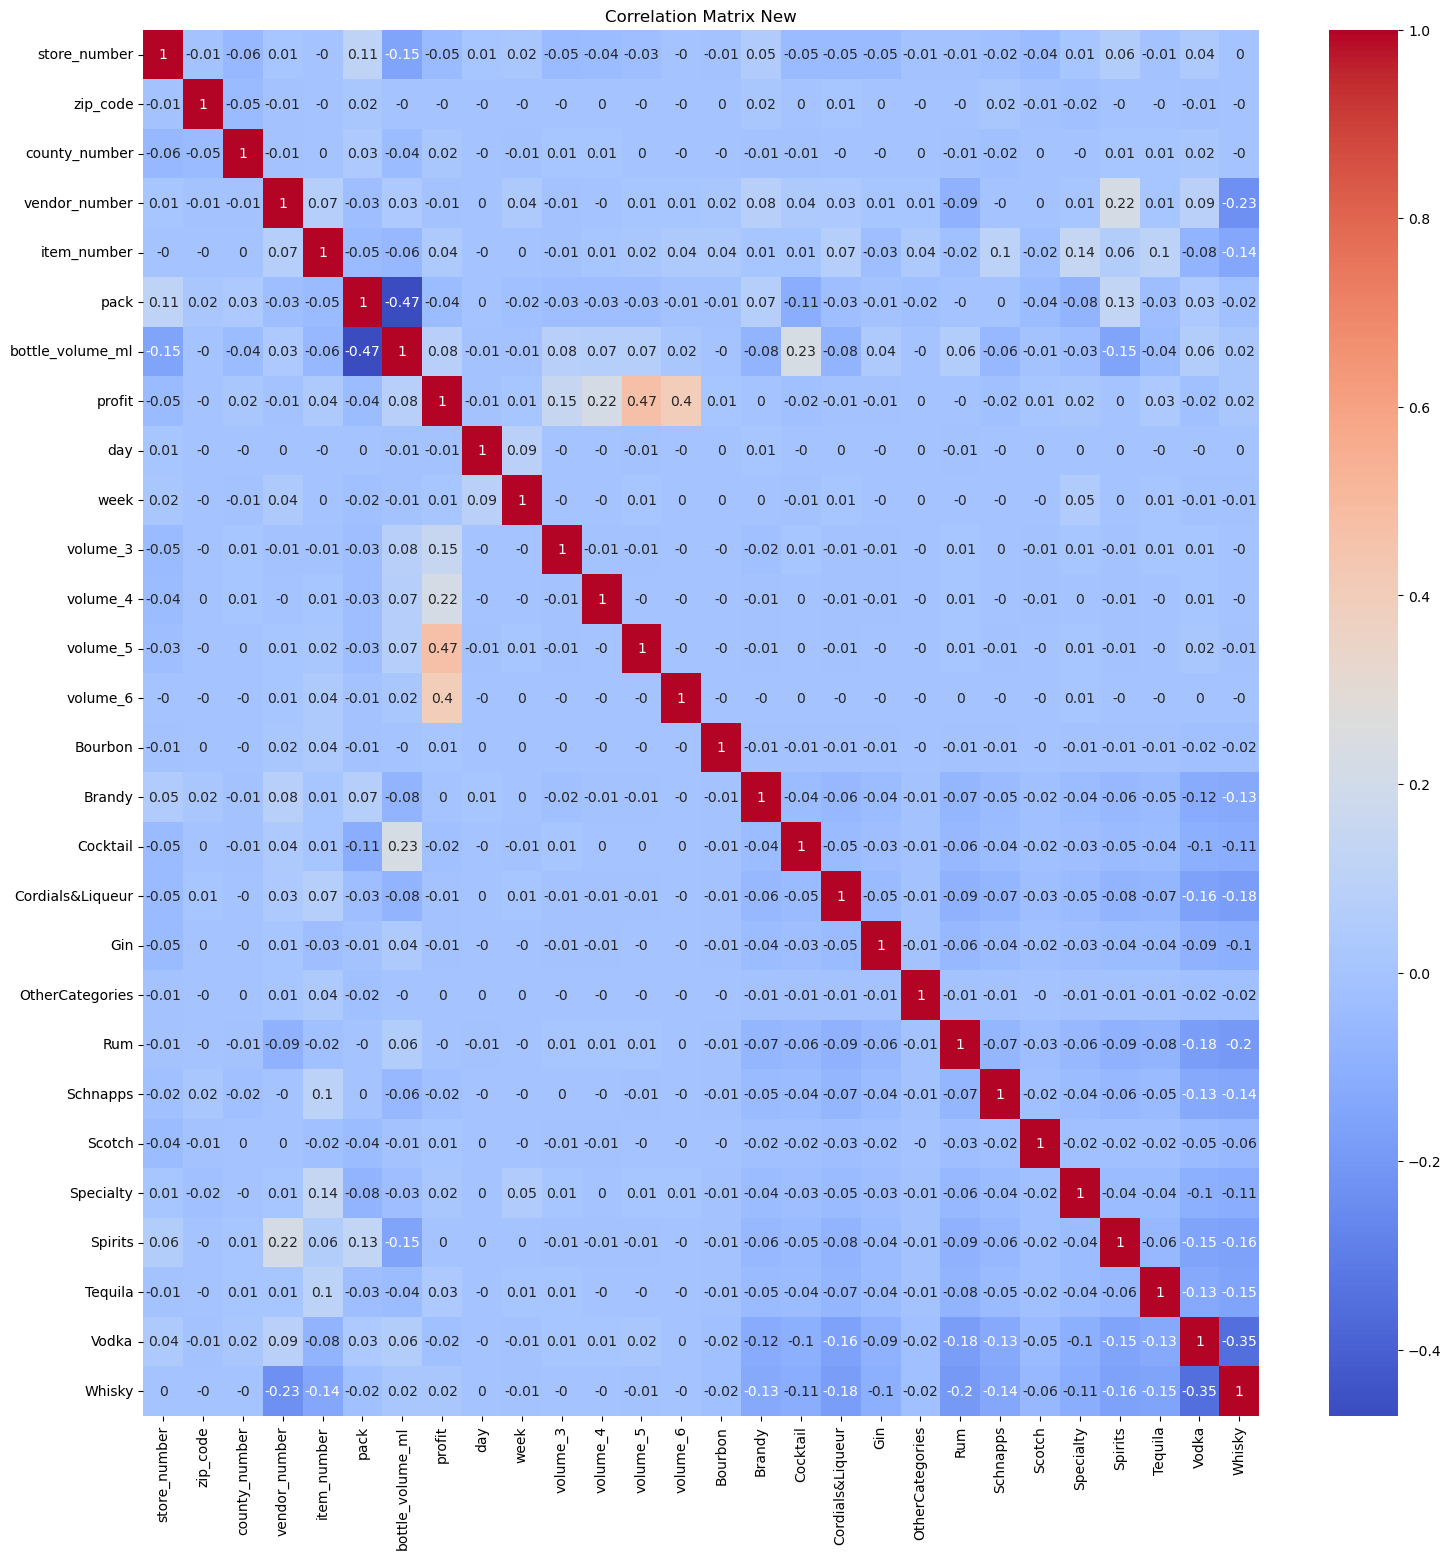

In [97]:
plt.figure(figsize=(18, 18))
corr_matrix = df11.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix New')
plt.show()

There is a strong negative correlation (-0.47) between `pack` and `bottle_volume_ml`. We would consider to drop them after baseline model. The matrix does not reveal any strong linear relationships between the variables and profit, which suggests that a simple linear model might not be adequate for predicting profit based on these variables alone. We need to consider more complex models.

In [98]:
df11.to_parquet('IowaNext.parquet')

In [100]:
df11.to_csv('IowaNext.csv')

In [99]:
df11.nunique()

invoice_and_item_number    2805303
date                           326
store_number                  1929
store_name                    1952
address                       1933
city                           441
zip_code                       479
county_number                   99
county                          99
category_name                   47
vendor_number                  222
vendor_name                    222
item_number                   4543
item_description              4022
pack                            21
bottle_volume_ml                25
profit                       10612
day                             31
week                            52
volume_3                         2
volume_4                         2
volume_5                         2
volume_6                         2
Bourbon                          2
Brandy                           2
Cocktail                         2
Cordials&Liqueur                 2
Gin                              2
OtherCategories     

Next Notebook: ModelsPT1

END